In [5]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

In [6]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
    ]

In [7]:
epochs = 10
batch_size = 64

# Validation with br_net and different overlap

## SimpleConv

#### overlap=0

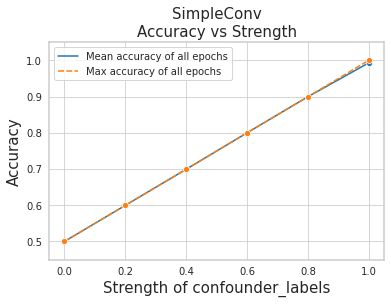

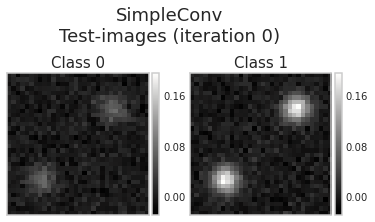

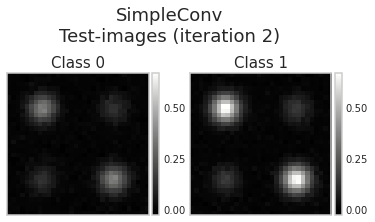

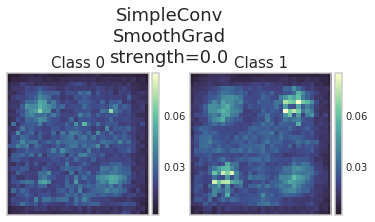

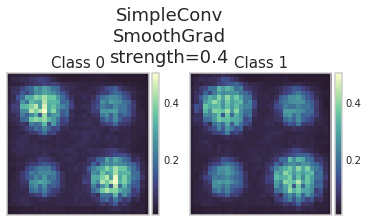

In [8]:
c = CI.confounder(seed=42)
model = Models.SimpleConv()
c.generate_data(mode="br_net", overlap=0, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])

#### overlap=16

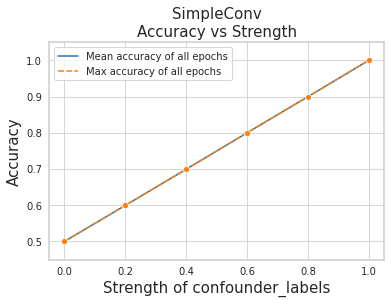

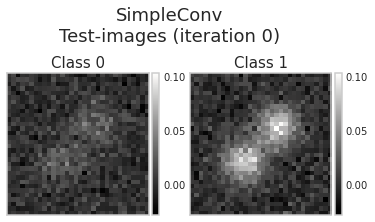

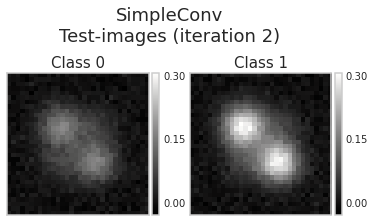

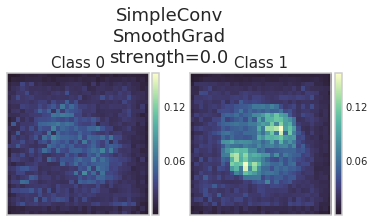

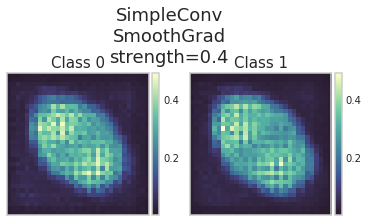

In [9]:
c = CI.confounder(seed=42)
model = Models.SimpleConv()
c.generate_data(mode="br_net", overlap=16, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])

#### overlap=32

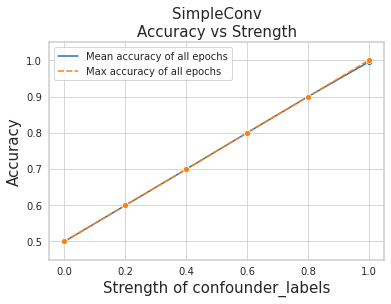

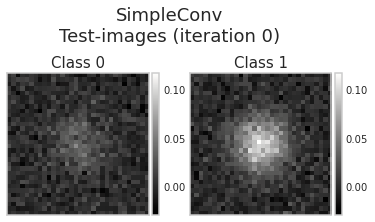

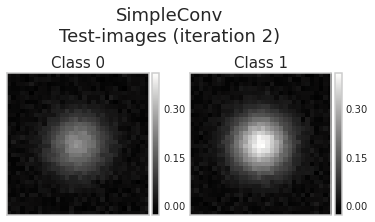

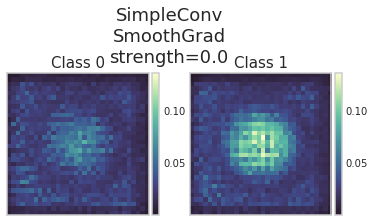

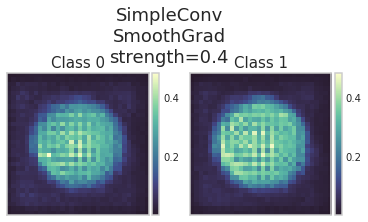

In [10]:
c = CI.confounder(seed=42)
model = Models.SimpleConv()
c.generate_data(mode="br_net", overlap=32, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])

## Neural Network

#### overlap=0

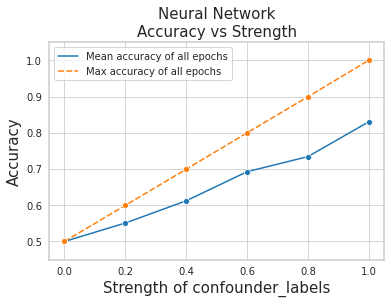

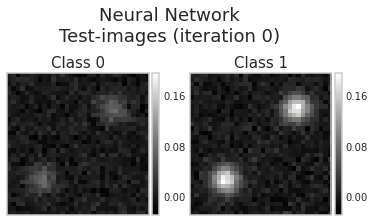

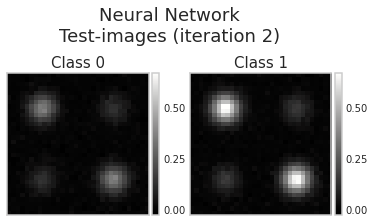

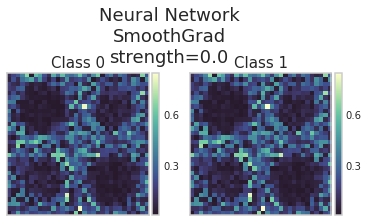

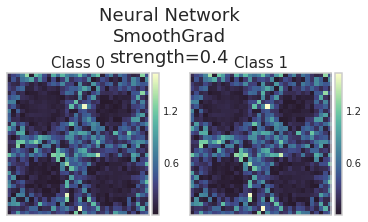

In [11]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br_net", overlap=0, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])

#### overlap=16

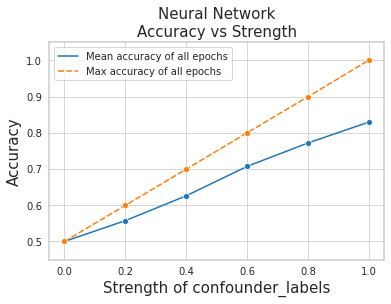

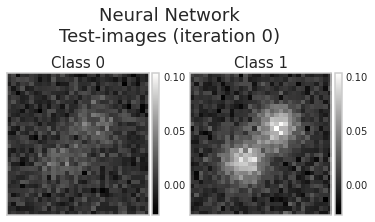

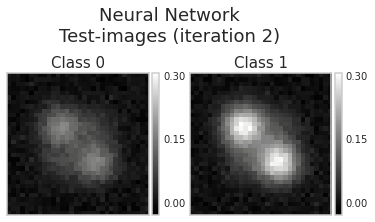

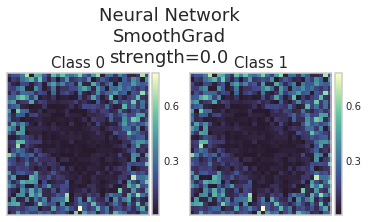

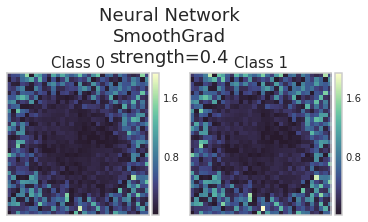

In [12]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br_net", overlap=16, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])

#### overlap=32

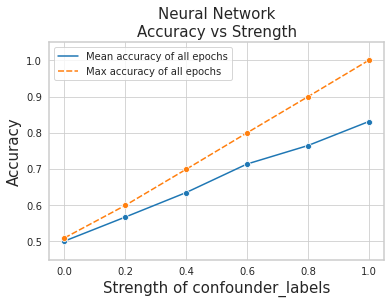

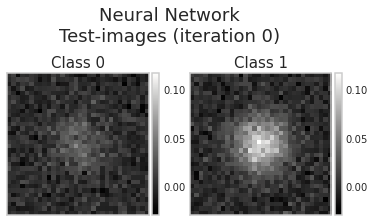

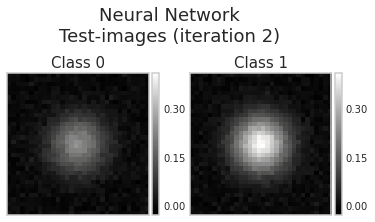

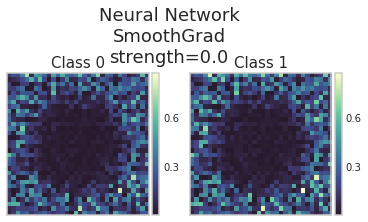

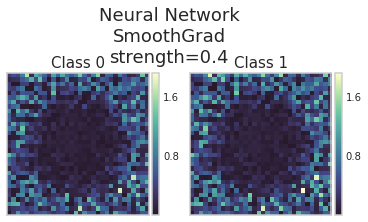

In [13]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br_net", overlap=32, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])

# Validation with other parameter set for the generator

It seems that the NNs are still able to separate the classes in the overlap=32 cases. This might possibly be because there is a large difference between the values of the features and the confounders between the classes. Adding the features on top of the confounders does not change it's value by much and the classes should be theoretically separable. If we choose the parameters as shown below the network should not be able to learn anything in the overlap=32 case. In the overlap=0 case perfect separation should be possible.

In [14]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[3, 6], [1, 4]] # confounder
]

## SimpleConv

#### overlap=0

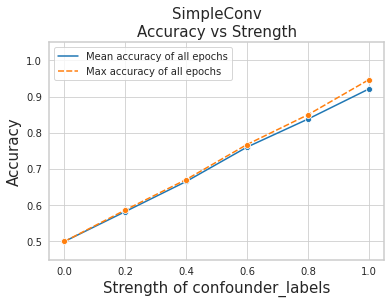

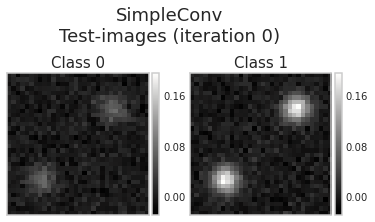

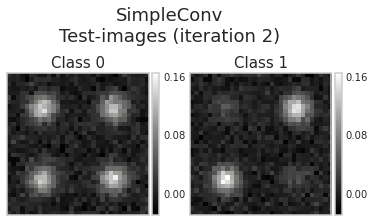

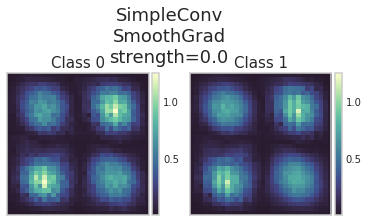

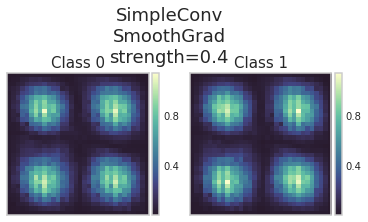

In [15]:
c = CI.confounder(seed=42)
model = Models.SimpleConv()
c.generate_data(mode="br_net", overlap=0, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2),
                params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr': 0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])

#### overlap=32

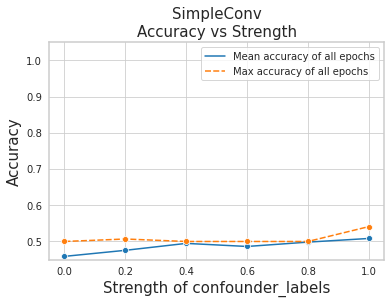

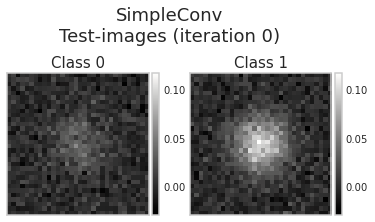

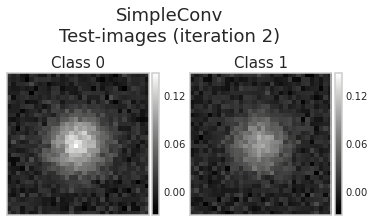

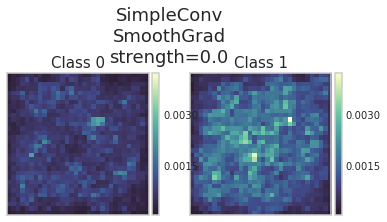

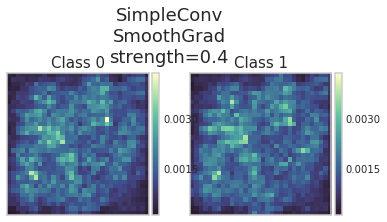

In [17]:
c = CI.confounder(seed=42)
model = Models.SimpleConv()
c.generate_data(mode="br_net", overlap=32, samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=epochs, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(test_images=True, accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_image_iteration=[0,2])